In [1023]:
import numpy as np
from scipy.interpolate import CubicSpline

from scipy.sparse import coo_matrix

import matplotlib.pyplot as plt
from numpy import cos, sin, log, exp
from math import pi
from numpy.linalg import norm

import random

import sympy as sp

# Метод Тейлора

## Фунции производных

In [1024]:
def fy(x):
    return y[int(x//h)]

In [1025]:
def fy1(x):
    #print(x, h, x//h)
    return y1[int(x//h)]

In [1026]:
def fy2(x):
    return (x*exp(-2*x)-8*fy1(x)-8*fy(x))/6

In [1027]:
def fy3(x):
    return ((1-2*x)*exp(-2*x)-8*fy2(x)-8*fy1(x))/6


In [1028]:
def fy4(x):
    return (exp(-2*x)*(1-2*x)-8*fy3(x)-8*fy2(x))/6

## Поиск значений

In [1029]:
def taylor(n):
    global y, y1, h, x_mass
    y=[1]
    y1=[0]
    h=2/n
    x_mass=np.arange(0, 2, h)
    for elem in x_mass[1:]:
        #print(elem)
        y1+=[fy1(elem-h)+h*fy2(elem-h)+h**2*fy3(elem-h)/2+h**3*fy4(elem-h)/6]
        y+=[fy(elem-h)+h*fy1(elem-h)+h**2*fy2(elem-h)/2+h**3*fy3(elem-h)/6+h**4*fy4(elem-h)/24]
    return np.array(y)

In [1038]:
eps = 0.01
N = 10
k=0
while True:
    k+=1
    T = taylor(N)
    T2 = taylor(2*N)
    error = norm(T2[0::2]-T)/norm(T2[0::2]) #(norm(T[1] - T2[1][0::2]) + norm(T[2] - T2[2][0::2]) + norm(T[3] - T2[3][0::2]))/(norm(T2[1]) + norm(T2[2]) + norm(T2[3]))
    N += 1
    if error < eps:
        #print(error)
        #print(N)
        break
print("Итераций: ",k)

Итераций:  7


## Графики

Text(0.5, 1.0, 'y(x)')

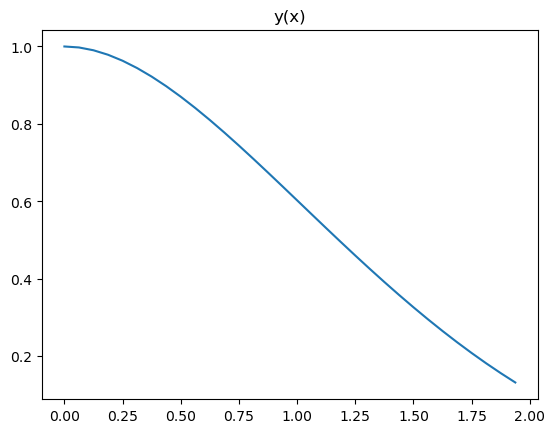

In [1039]:
plt.plot(x_mass, y)
plt.title("y(x)")

Text(0.5, 1.0, 'y`(x)')

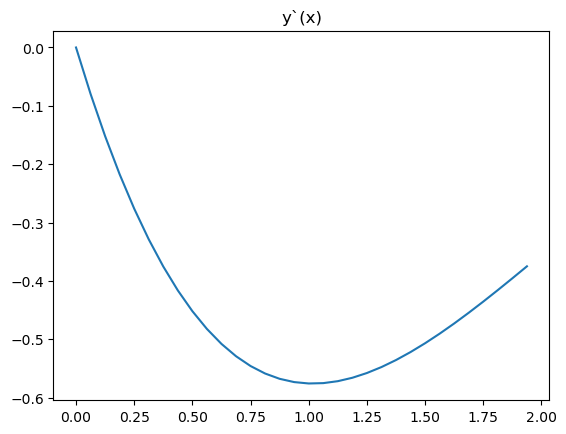

In [1040]:
plt.plot(x_mass, y1)
plt.title("y`(x)")

Text(0.5, 1.0, 'Фазовая траектория')

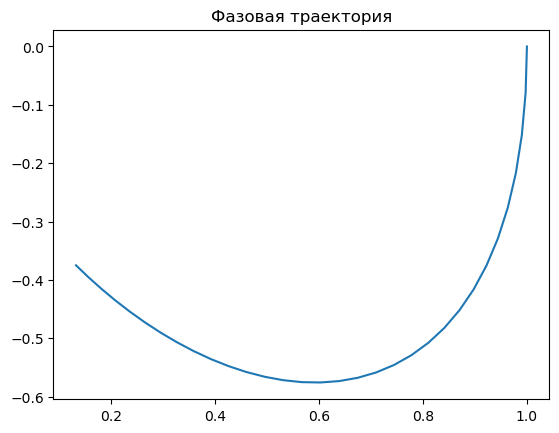

In [1041]:
plt.plot(y, y1)
plt.title("Фазовая траектория")

# Библиотечный

In [1042]:
import numpy as np
from scipy. integrate import odeint
import matplotlib.pyplot as plt

 # create function
def f(s, x):
    u1=s[1]
    v1=-8/6*s[0]-8/6*s[1]+x*exp(-2*x)/6
    return [u1, v1] 

#t = np.linspace( 0, 2, 100) # vector of time
#y0 = [0, 0] # start value
sol = odeint(f, [1, 0], x_mass) # solve eq.
y_bibl = sol[:,0]
y1_bibl = sol[:,1]

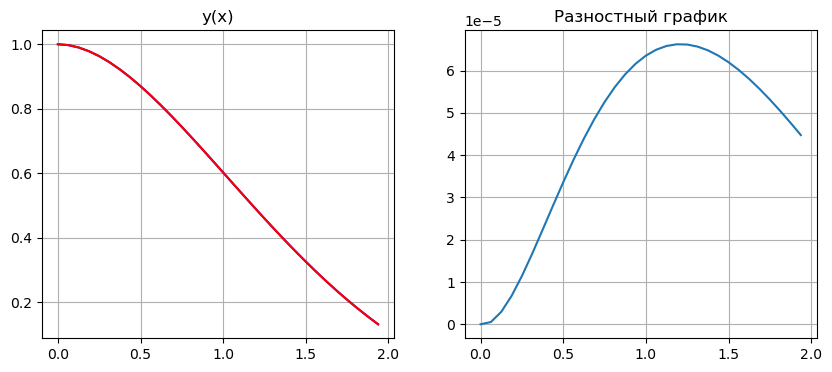

In [1043]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.grid()
plt.title("y(x)")
plt.plot(x_mass, y,'b')
plt.plot(x_mass, y_bibl,'r')

plt.subplot(1, 2, 2)
plt.grid()
plt.title("Разностный график")
plt.plot(x_mass, y-y_bibl)
#plt.plot(x_mass, y_bibl)

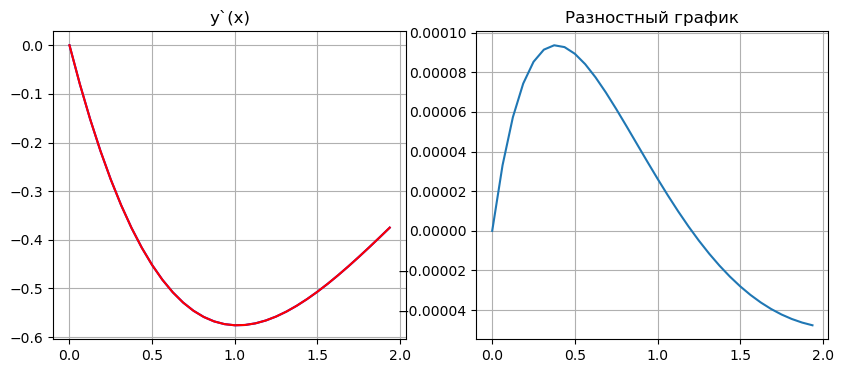

In [1044]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.grid()
plt.title("y`(x)")
plt.plot(x_mass, y1, 'b')
plt.plot(x_mass, y1_bibl, 'r')

plt.subplot(1, 2, 2)
plt.grid()
plt.title("Разностный график")
plt.plot(x_mass, y1-y1_bibl)
#plt.plot(x_mass, y_bibl)

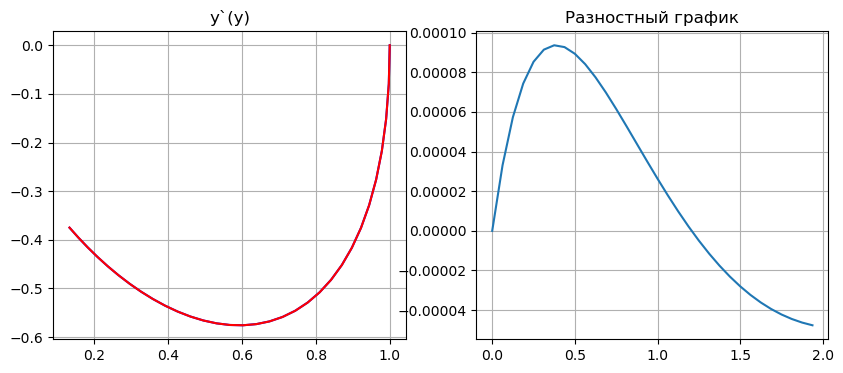

In [1045]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.grid()
plt.title("y`(y)")
plt.plot(y, y1, 'b')
plt.plot(y_bibl, y1_bibl, 'r')

plt.subplot(1, 2, 2)
plt.grid()
plt.title("Разностный график")
plt.plot(x_mass, y1-y1_bibl)
#plt.plot(x_mass, y_bibl)